In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def showImage(imageForShowing):
    plt.figure(figsize = (2.5, 2.5))
    plt.imshow(imageForShowing)

In [3]:
im = cv2.imread("5d.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.imread("5d.jpg")

In [4]:
_, im = cv2.threshold(im, 72, 255, cv2.THRESH_BINARY_INV)
#ret, im = cv2.threshold(im, 100, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#ret, im = cv2.threshold(im, 100, 255, cv2.THRESH_OTSU)

Text(0.5, 1.0, 'Threshold Image')

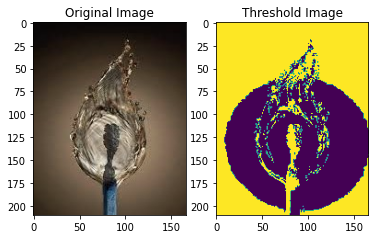

In [5]:
plt.subplot(121),plt.imshow(original)
plt.title('Original Image')
plt.subplot(122),plt.imshow(im)
plt.title('Threshold Image')

In [6]:
kernel = np.ones((10,10),np.uint8)
im = cv2.erode(im, kernel)

In [7]:
kernel = np.ones((10,10),np.uint8)
dilateImage = cv2.dilate(im, kernel, iterations = 1)

Text(0.5, 1.0, 'Dilate Image')

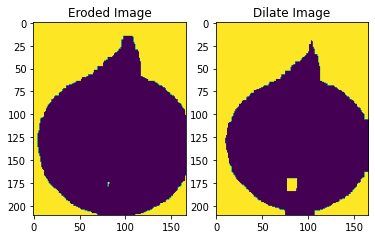

In [8]:
plt.subplot(121),plt.imshow(im)
plt.title('Eroded Image')
plt.subplot(122),plt.imshow(dilateImage)
plt.title('Dilate Image')

In [9]:
unknown = cv2.subtract(dilateImage,im)

In [10]:
_, markers = cv2.connectedComponents(im)

Text(0.5, 1.0, 'connected point Image')

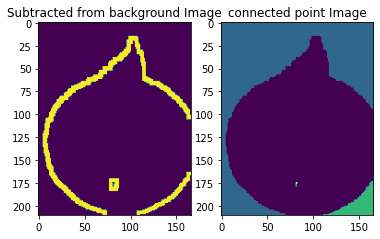

In [11]:
plt.subplot(121),plt.imshow(unknown)
plt.title('Subtracted from background Image')
plt.subplot(122),plt.imshow(markers)
plt.title('connected point Image')

In [12]:
markers = markers + 1
markers[unknown==255] = 0

In [13]:
markers = cv2.watershed(original,markers)
original[markers== -1] = [250, 0, 210]

Text(0.5, 1.0, 'Original Marked Image')

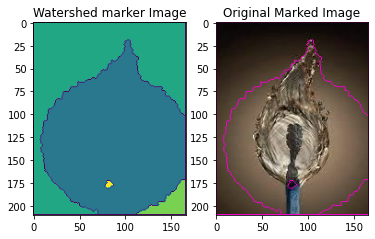

In [14]:
plt.subplot(121),plt.imshow(markers)
plt.title('Watershed marker Image')
plt.subplot(122),plt.imshow(original)
plt.title('Original Marked Image')